# Hierarchical classification of papers

In [2]:
#Loading previously downloaded researcher info in .cvs format 

papers = pd.read_csv("GustavoDeco_MicrosoftAcedemic.csv", header=0)



In [3]:
# Preview the first 10 lines of the loaded data
papers.head(10)
#papers.head(0) # print only the header of table

,Cites,Authors,Title,Year,Source,Publisher,ArticleURL,CitesURL,GSRank,QueryDate,...,Volume,Issue,StartPage,EndPage,ECC,CitesPerYear,CitesPerAuthor,AuthorCount,Age,Abstract
0,1118,"Gustavo Deco, Viktor K Jirsa, Viktor K Jirsa, ...",Emerging concepts for the dynamical organizati...,2011,Nature Reviews Neuroscience,NaN,https://www.nature.com/articles/nrn2961,NaN,1,06/05/2020 21:15,...,12.0,1.0,43.0,56.0,1118,124.22,280,4,9,A broad body of experimental work has demonstr...
1,794,"Gustavo Deco, Viktor K Jirsa, P A Robinson, Mi...",The Dynamic Brain: From Spiking Neurons to Neu...,2008,PLOS Computational Biology,NaN,http://europepmc.org/articles/PMC2519166,NaN,2,06/05/2020 21:15,...,4.0,8.0,NaN,NaN,794,66.17,132,6,12,"The cortex is a complex system, characterized ..."
2,539,"Gustavo Deco, Viktor K Jirsa, Anthony R Mcinto...","Key role of coupling, delay, and noise in rest...",2009,Proceedings of the National Academy of Science...,NaN,http://europepmc.org/articles/PMC2690605,NaN,3,06/05/2020 21:15,...,106.0,25.0,10302.0,10307.0,539,49.00,108,5,11,A growing body of neuroimaging research has do...
3,437,"Gustavo Deco, Viktor K Jirsa",Ongoing Cortical Activity at Rest: Criticality...,2012,The Journal of Neuroscience,NaN,https://repositori.upf.edu/handle/10230/23077,NaN,5,06/05/2020 21:15,...,32.0,10.0,3366.0,3375.0,437,54.63,219,2,8,"The ongoing activity of the brain at rest, i.e..."
4,338,"Joana Cabral, Etienne Hugues, Olaf Sporns, Gus...",Role of local network oscillations in resting-...,2011,NeuroImage,NaN,https://doi.org/10.1016/j.neuroimage.2011.04.010,NaN,6,06/05/2020 21:15,...,57.0,1.0,130.0,139.0,338,37.56,85,4,9,Spatio-temporally organized low-frequency fluc...
5,292,"Gustavo Deco, Adrian Poncealvarez, Dante Manti...",Resting-State Functional Connectivity Emerges ...,2013,The Journal of Neuroscience,NaN,http://europepmc.org/articles/PMC3718368,NaN,7,06/05/2020 21:15,...,33.0,27.0,11239.0,11252.0,292,41.71,37,8,7,Brain fluctuations at rest are not random but ...
6,359,"Gustavo Deco, Edmund T Rolls",A Neurodynamical cortical model of visual atte...,2004,Vision Research,NaN,http://www.ncbi.nlm.nih.gov/pubmed/14693189,NaN,8,06/05/2020 21:15,...,44.0,6.0,621.0,642.0,359,22.44,180,2,16,We describe a model of invariant visual object...
7,313,"Rikkert Hindriks, Mohit H Adhikari, Yusuke Mur...",Can sliding-window correlations reveal dynamic...,2016,NeuroImage,NaN,http://europepmc.org/articles/PMC4758830,NaN,9,06/05/2020 21:15,...,127.0,NaN,242.0,256.0,313,78.25,35,9,4,"During the last several years, the focus of re..."
8,311,"Edmund T Rolls, Marco Loh, Gustavo Deco, Georg...",Computational models of schizophrenia and dopa...,2008,Nature Reviews Neuroscience,NaN,http://europepmc.org/abstract/MED/18714326,NaN,10,06/05/2020 21:15,...,9.0,9.0,696.0,709.0,311,25.92,78,4,12,Computational neuroscience models can be used ...
9,271,"Enrique C A Hansen, Demian Battaglia, Andreas ...",Functional connectivity dynamics: Modeling the...,2015,NeuroImage,NaN,http://pubman.mpdl.mpg.de/pubman/item/escidoc:...,NaN,11,06/05/2020 21:15,...,105.0,NaN,525.0,535.0,271,54.20,54,5,5,Abstract Functional connectivity (FC) sheds li...


In [4]:
#Only uploading title, year and abstract for an easier manipulation of data
colsIwant = ["Title", "Year", "Abstract"] #columns i want to use
papers = pd.read_csv("GustavoDeco_MicrosoftAcedemic.csv", usecols = colsIwant)
papers.head(100)


#papers.values


,Title,Year,Abstract
0,Emerging concepts for the dynamical organizati...,2011,A broad body of experimental work has demonstr...
1,The Dynamic Brain: From Spiking Neurons to Neu...,2008,"The cortex is a complex system, characterized ..."
2,"Key role of coupling, delay, and noise in rest...",2009,A growing body of neuroimaging research has do...
3,Ongoing Cortical Activity at Rest: Criticality...,2012,"The ongoing activity of the brain at rest, i.e..."
4,Role of local network oscillations in resting-...,2011,Spatio-temporally organized low-frequency fluc...
...,...,...,...
95,Object-based visual neglect: a computational h...,2002,Some patients with damage to the right parieta...
96,A neurodynamical model for selective visual at...,2001,We present a neurodynamical model to study and...
97,Human consciousness is supported by dynamic co...,2019,Adopting the framework of brain dynamics as a ...
98,Connectome-harmonic decomposition of human bra...,2017,Recent studies have started to elucidate the e...


In [5]:

papers['Title']
titles = papers['Title'].values
print(titles)
titles.size

['Emerging concepts for the dynamical organization of resting-state activity in the brain'
 'The Dynamic Brain: From Spiking Neurons to Neural Masses and Cortical Fields'
 'Key role of coupling, delay, and noise in resting brain fluctuations'
 'Ongoing Cortical Activity at Rest: Criticality, Multistability, and Ghost Attractors'
 'Role of local network oscillations in resting-state functional connectivity'
 'Resting-State Functional Connectivity Emerges from Structurally and Dynamically Shaped Slow Linear Fluctuations'
 'A Neurodynamical cortical model of visual attention and invariant object recognition'
 'Can sliding-window correlations reveal dynamic functional connectivity in resting-state fMRI?'
 'Computational models of schizophrenia and dopamine modulation in the prefrontal cortex'
 'Functional connectivity dynamics: Modeling the switching behavior of the resting state'
 'Rethinking segregation and integration: contributions of whole-brain modelling'
 'Attention, short-term memo

390

In [6]:
years = papers['Year'].values
print(years)
years.size

[2011 2008 2009 2012 2011 2013 2004 2016 2008 2015 2015 2005 2011 2013
 2005 2014 2014 2011 2009 2003 2000 2006 1996 2014 2007 2014 2015 1995
 2010 2010 2004 2004 2009 2012 2012 2013 2002 2012 2017 2016 2017 1997
 2010 2014 2014 2012 2012 2000 2010 2013 2013 2002 2001 2012 2016 2009
 2007 2016 2008 2002 2010 2013 2010 2013 1995 2015 2009 2004 2011 2008
 2009 2013 2007 2014 2001 2017 2014 2017 2005 2009 2015 2008 1998 2011
 2017 2015 2016 2007 2011 2008 2015 2006 2016 2013 2008 2002 2001 2019
 2017 2013 2013 1998 1988 2018 1995 2017 2017 2007 2017 2017 2019 1998
 2017 2014 2004 2004 2014 2017 2011 2002 2014 2006 2012 2012 2017 2017
 2019 1995 2007 1999 1984 2018 2012 2005 2009 2011 2011 2007 2012 2004
 2001 1995 2017 2014 2000 2005 2006 1987 2013 2017 2015 2018 2015 1986
 2017 2014 2015 2005 2018 2018 2015 2017 2016 2017 1997 1997 2019 2011
 2011 1997 2018 2019 2018 2012 2006 1996 2007 2003 1986 2015 2017 2015
 2017 2007 2006 1997 1987 2011 2016 2008 2010 1993 1991 2015 2011 2001
 2002 

390

In [7]:
abstracts = papers['Abstract'].values
print(abstracts)
abstracts.size

['A broad body of experimental work has demonstrated that apparently spontaneous brain activity is not random. At the level of large-scale neural systems, as measured with functional MRI (fMRI), this ongoing activity reflects the organization of a series of highly coherent functional networks. These so-called resting-state networks (RSNs) closely relate to the underlying anatomical connectivity but cannot be understood in those terms alone. Here we review three large-scale neural system models of primate neocortex that emphasize the key contributions of local dynamics, signal transmission delays and noise to the emerging RSNs. We propose that the formation and dissolution of resting-state patterns reflects the exploration of possible functional network configurations around a stable anatomical skeleton.'
 'The cortex is a complex system, characterized by its dynamics and architecture, which underlie many functions such as action, perception, learning, language, and cognition. Its struc

390

In [8]:
# keyword extraction https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34

dataset = pd.read_csv("GustavoDeco_MicrosoftAcedemic.csv", usecols = ["Title", "Year", "Abstract"] )
dataset.head()

,Title,Year,Abstract
0,Emerging concepts for the dynamical organizati...,2011,A broad body of experimental work has demonstr...
1,The Dynamic Brain: From Spiking Neurons to Neu...,2008,"The cortex is a complex system, characterized ..."
2,"Key role of coupling, delay, and noise in rest...",2009,A growing body of neuroimaging research has do...
3,Ongoing Cortical Activity at Rest: Criticality...,2012,"The ongoing activity of the brain at rest, i.e..."
4,Role of local network oscillations in resting-...,2011,Spatio-temporally organized low-frequency fluc...


In [9]:
#Fetch wordcount for each abstract
dataset['word_count'] = dataset['Abstract'].apply(lambda x: len(str(x).split(" ")))
dataset[['Abstract','word_count']].head()

,Abstract,word_count
0,A broad body of experimental work has demonstr...,114
1,"The cortex is a complex system, characterized ...",281
2,A growing body of neuroimaging research has do...,247
3,"The ongoing activity of the brain at rest, i.e...",36
4,Spatio-temporally organized low-frequency fluc...,342


In [46]:
##Descriptive statistics of word counts
dataset.word_count.describe()

#dataset.shape

count     390.000000
mean      191.066667
std        96.014864
min        11.000000
25%       138.500000
50%       186.000000
75%       240.000000
max      1068.000000
Name: word_count, dtype: float64

In [11]:
#Identify common words
freq = pd.Series(' '.join(dataset['Abstract']).split()).value_counts()[:20]
freq

the        4662
of         3225
and        1932
in         1723
a          1609
to         1564
that        904
is          816
for         610
with        553
by          549
brain       533
we          475
The         444
are         431
We          424
as          412
network     367
on          363
be          352
dtype: int64

In [12]:
#Identify uncommon words
freq1 =  pd.Series(' '.join(dataset 
         ['Abstract']).split()).value_counts()[-20:]
freq1

challenging.             1
Brain,”                  1
electrophysiological,    1
modes—fundamental        1
(“communities”)          1
recruited                1
profound                 1
visibility               1
(MEG),                   1
rates.                   1
(VFM).                   1
placebo                  1
self.                    1
(2000),                  1
ideal                    1
nonrandom                1
narrower                 1
re-emerging              1
small-worldness)         1
abort                    1
dtype: int64

In [13]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

lem = WordNetLemmatizer()
stem = PorterStemmer()

# eXAMPLE 
word = "inversely"
print("stemming:",stem.stem(word))
print("lemmatization:", lem.lemmatize(word, "v"))

stemming: invers
lemmatization: inversely


In [14]:
# STOPWORDS

#nltk.download() #<--- run only the first time to download nltk 

# Creating a list of stop words and adding custom stopwords
stop_words = nltk.corpus.stopwords.words('english')

#printing some expamples of commonly used stopwords 
print (stop_words[:40])




['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this']


In [15]:
 dataset['Abstract'][1]

'The cortex is a complex system, characterized by its dynamics and architecture, which underlie many functions such as action, perception, learning, language, and cognition. Its structural architecture has been studied for more than a hundred years; however, its dynamics have been addressed much less thoroughly. In this paper, we review and integrate, in a unifying framework, a variety of computational approaches that have been used to characterize the dynamics of the cortex, as evidenced at different levels of measurement. Computational models at different space–time scales help us understand the fundamental mechanisms that underpin neural processes and relate these processes to neuroscience data. Modeling at the single neuron level is necessary because this is the level at which information is exchanged between the computing elements of the brain; the neurons. Mesoscopic models tell us how neural elements interact to yield emergent behavior at the level of microcolumns and cortical c

In [16]:
 dataset['Abstract'][2]


'A growing body of neuroimaging research has documented that, in the absence of an explicit task, the brain shows temporally coherent activity. This so-called “resting state” activity or, more explicitly, the default-mode network, has been associated with daydreaming, free association, stream of consciousness, or inner rehearsal in humans, but similar patterns have also been found under anesthesia and in monkeys. Spatiotemporal activity patterns in the default-mode network are both complex and consistent, which raises the question whether they are the expression of an interesting cognitive architecture or the consequence of intrinsic network constraints. In numerical simulation, we studied the dynamics of a simplified cortical network using 38 noise-driven (Wilson–Cowan) oscillators, which in isolation remain just below their oscillatory threshold. Time delay coupling based on lengths and strengths of primate corticocortical pathways leads to the emergence of 2 sets of 40-Hz oscillator

In [17]:
array_abstracts = np.array(dataset['Abstract'])
array_abstracts[2]

'A growing body of neuroimaging research has documented that, in the absence of an explicit task, the brain shows temporally coherent activity. This so-called “resting state” activity or, more explicitly, the default-mode network, has been associated with daydreaming, free association, stream of consciousness, or inner rehearsal in humans, but similar patterns have also been found under anesthesia and in monkeys. Spatiotemporal activity patterns in the default-mode network are both complex and consistent, which raises the question whether they are the expression of an interesting cognitive architecture or the consequence of intrinsic network constraints. In numerical simulation, we studied the dynamics of a simplified cortical network using 38 noise-driven (Wilson–Cowan) oscillators, which in isolation remain just below their oscillatory threshold. Time delay coupling based on lengths and strengths of primate corticocortical pathways leads to the emergence of 2 sets of 40-Hz oscillator

In [18]:

corpus = []
size = abstracts.size

for i in range(0, size):
    #Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', array_abstracts[i])
    
    #Convert to lowercase
    text = text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()
    
    ##Stemming
    ps=PorterStemmer()
    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [19]:
#View corpus item
corpus[1]

'cortex complex system characterized dynamic architecture underlie many function action perception learning language cognition structural architecture studied hundred year however dynamic addressed much le thoroughly paper review integrate unifying framework variety computational approach used characterize dynamic cortex evidenced different level measurement computational model different space time scale help u understand fundamental mechanism underpin neural process relate process neuroscience data modeling single neuron level necessary level information exchanged computing element brain neuron mesoscopic model tell u neural element interact yield emergent behavior level microcolumns cortical column macroscopic model inform u whole brain dynamic interaction large scale neural system cortical region thalamus brain stem level description relates uniquely neuroscience data single unit recording local field potential functional magnetic resonance imaging fmri electroencephalogram eeg magn

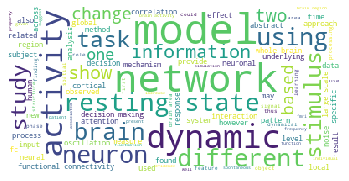

In [20]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(background_color='white', stopwords=stop_words, max_words=100, max_font_size=50, random_state=42).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
import re

cv = CountVectorizer(max_df = 1.0, stop_words = stop_words, max_features=10000, ngram_range=(1,3))
X = cv.fit_transform(corpus)

In [22]:
list(cv.vocabulary_.keys())[:10]


['broad',
 'body',
 'experimental',
 'work',
 'demonstrated',
 'apparently',
 'spontaneous',
 'brain',
 'activity',
 'random']

In [23]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

In [24]:
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

[Text(0, 0, 'brain'),
 Text(0, 0, 'network'),
 Text(0, 0, 'model'),
 Text(0, 0, 'state'),
 Text(0, 0, 'dynamic'),
 Text(0, 0, 'activity'),
 Text(0, 0, 'functional'),
 Text(0, 0, 'connectivity'),
 Text(0, 0, 'neuron'),
 Text(0, 0, 'information'),
 Text(0, 0, 'time'),
 Text(0, 0, 'task'),
 Text(0, 0, 'data'),
 Text(0, 0, 'resting'),
 Text(0, 0, 'different'),
 Text(0, 0, 'study'),
 Text(0, 0, 'neural'),
 Text(0, 0, 'area'),
 Text(0, 0, 'decision'),
 Text(0, 0, 'visual')]

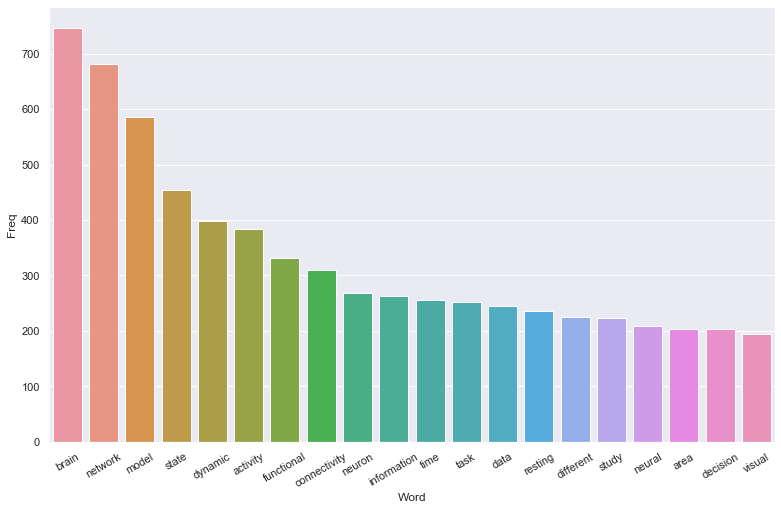

In [25]:
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

In [26]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=corpus[1]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [27]:
#Based on the TF-IDF scores, we can extract the words with the highest scores to get the keywords for a document.
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        feature_vals.append(feature_names[idx]) #keyword names
        
    
    return feature_vals

In [28]:
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())

#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names, sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
print(keywords)


#for k in keywords:
 #   print(k,keywords[k])


Abstract:
cortex complex system characterized dynamic architecture underlie many function action perception learning language cognition structural architecture studied hundred year however dynamic addressed much le thoroughly paper review integrate unifying framework variety computational approach used characterize dynamic cortex evidenced different level measurement computational model different space time scale help u understand fundamental mechanism underpin neural process relate process neuroscience data modeling single neuron level necessary level information exchanged computing element brain neuron mesoscopic model tell u neural element interact yield emergent behavior level microcolumns cortical column macroscopic model inform u whole brain dynamic interaction large scale neural system cortical region thalamus brain stem level description relates uniquely neuroscience data single unit recording local field potential functional magnetic resonance imaging fmri electroencephalogra

In [36]:
#------ iterate through all  abstracts to get all of the keywords ------ 

# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
keywords = []
for i in range(0, size):

    doc = corpus[i]
 
    #generate tf-idf for the given document
    tf_idf_vector = tfidf_transformer.transform(cv.transform([doc]))
         
    #sort the tf-idf vectors by descending order of scores
    sorted_items = sort_coo(tf_idf_vector.tocoo())
        
                                          
    #extract only the top n; n here is 10
    paperKeywords = extract_topn_from_vector(feature_names, sorted_items, 10) #<--- number of keywords i want to get
 
    keywords.append(paperKeywords) #<------ storing my keywords here 
    
    # now print the results
    print("\nAbstract:")
    print(doc)
    
    print("\nKeywords:")
    print(keywords[i])
    
      
        
        
     


Abstract:
broad body experimental work demonstrated apparently spontaneous brain activity random level large scale neural system measured functional mri fmri ongoing activity reflects organization series highly coherent functional network called resting state network rsns closely relate underlying anatomical connectivity cannot understood term alone review three large scale neural system model primate neocortex emphasize key contribution local dynamic signal transmission delay noise emerging rsns propose formation dissolution resting state pattern reflects exploration possible functional network configuration around stable anatomical skeleton

Keywords:
['scale neural system', 'scale neural', 'large scale neural', 'reflects', 'neural system', 'rsns', 'functional network', 'anatomical', 'large scale', 'possible functional']

Abstract:
cortex complex system characterized dynamic architecture underlie many function action perception learning language cognition structural architecture stu


Abstract:
b r c computational neuroscience integrate fire attractor network model used understand factor alter stability cortical network face noise caused example neuronal spiking time reduction firing rate cortical neuron caused example reduced nmda receptor function present schizophrenia lead instability high firing rate attractor state normally implement short term memory attention contributing cognitive negative symptom schizophrenia reduced cortical inhibition caused reduction gaba neurotransmis sion present schizophrenia lead instability spontaneous firing state cortical network leading noise induced jump high firing rate attractor state even absence external input contributing positive symptom schizophrenia consider effect occurring time late adolescence including synaptic pruning decrease grey matter volume change gaba mediated inhibition dopamine may contribute onset individual schizophrenia time

Keywords:
['schizophrenia', 'caused', 'firing', 'schizophrenia lead instabilit


Abstract:
consider mechanism enable decision postponed period evidence provided using information theoretic approach show information forthcoming action becomes available activity neuron medial premotor cortex sequential decision making task second stimulus applied providing information decision whether first second stimulus higher vibrotactile frequency information decay delay period neuronal activity decline behavioral response made information increase behavioral response required model neuronal activity using attractor decision making network information reflecting decision maintained low level delay period selectively restored nonspecific input response required one mechanism short term memory synaptic facilitation implement mechanism postponed decision correct even little neuronal firing delay period postponed decision another mechanism graded firing rate different neuron delay period restoration nonspecific input low rate activity higher rate neuron still firing delay period me


Abstract:
abstract growing evidence dynamical analysis functional neuroimaging data suggests brain function understood exploration repertoire metastable connectivity pattern functional brain network potentially underlie different mental process present study characterizes brain dynamical exploration resting state network rapidly modulated intravenous infusion psilocybin tryptamine psychedelic found magic mushroom employed data driven approach characterize recurrent functional connectivity pattern focusing leading eigenvector bold phase coherence single tr resolution recurrent bold phase locking pattern pl state assessed statistically compared pre post infusion psilocybin term probability occurrence transition profile result validated using placebo session recurrent bold pl state revealed high spatial overlap canonical resting state network notably pl state forming frontoparietal subsystem strongly destabilized psilocybin injection concomitant increase probability occurrence another pl


Abstract:
experimental theoretical work related rate modulation gamma synchronization modulation visual attention review briefly influential experiment modeling work subject show attentional modulation generally get stronger along visual pathway rate gamma synchronization vary independently moreover show model system reaction time faster presence gamma synchronization suggests behavioral relevance gamma synchronization

Keywords:
['gamma synchronization', 'gamma', 'synchronization', 'modulation', 'rate', 'work', 'relevance gamma synchronization', 'relevance gamma', 'rate modulation gamma', 'rate gamma']

Abstract:
abstract network spiking neuron dynamic synapsis introduced yield mechanism learning spatio temporal stimulus pattern integrate fire postsynaptic neuron receive input spike train multiple dynamic synapsis synaptic dynamic based exact pre postsynaptic spike timing exhibit short term facilitation depression addition dependent adaptable long term configuration learning synapsis

In [41]:

print(keywords)


[['scale neural system', 'scale neural', 'large scale neural', 'reflects', 'neural system', 'rsns', 'functional network', 'anatomical', 'large scale', 'possible functional'], ['level', 'dynamic', 'model', 'neuroscience', 'element', 'emergent', 'scale', 'architecture', 'characterize', 'cortex'], ['sensitivity', 'oscillator', 'high sensitivity', 'coupling', 'conduction velocity', 'noise level', 'conduction', 'set', 'velocity', 'blood'], ['spatiotemporal pattern', 'spatiotemporal', 'structured spatiotemporal pattern', 'structured spatiotemporal', 'highly structured spatiotemporal', 'ongoing activity', 'brain rest', 'low frequency', 'called resting state', 'called resting'], ['empirically', 'gamma frequency range', 'frequency range', 'range', 'gamma frequency', 'neural', 'node', 'neural activity', 'fc', 'gamma'], ['fc', 'dynamic', 'statistical moment', 'fc emerges', 'moment', 'anatomical connection', 'dynamic mean field', 'dynamic mean', 'anatomical', 'structure function'], ['visual', 'fee

In [42]:
print(titles)
titles.size

['Emerging concepts for the dynamical organization of resting-state activity in the brain'
 'The Dynamic Brain: From Spiking Neurons to Neural Masses and Cortical Fields'
 'Key role of coupling, delay, and noise in resting brain fluctuations'
 'Ongoing Cortical Activity at Rest: Criticality, Multistability, and Ghost Attractors'
 'Role of local network oscillations in resting-state functional connectivity'
 'Resting-State Functional Connectivity Emerges from Structurally and Dynamically Shaped Slow Linear Fluctuations'
 'A Neurodynamical cortical model of visual attention and invariant object recognition'
 'Can sliding-window correlations reveal dynamic functional connectivity in resting-state fMRI?'
 'Computational models of schizophrenia and dopamine modulation in the prefrontal cortex'
 'Functional connectivity dynamics: Modeling the switching behavior of the resting state'
 'Rethinking segregation and integration: contributions of whole-brain modelling'
 'Attention, short-term memo

390

In [43]:
print(abstracts)
abstracts.size

['A broad body of experimental work has demonstrated that apparently spontaneous brain activity is not random. At the level of large-scale neural systems, as measured with functional MRI (fMRI), this ongoing activity reflects the organization of a series of highly coherent functional networks. These so-called resting-state networks (RSNs) closely relate to the underlying anatomical connectivity but cannot be understood in those terms alone. Here we review three large-scale neural system models of primate neocortex that emphasize the key contributions of local dynamics, signal transmission delays and noise to the emerging RSNs. We propose that the formation and dissolution of resting-state patterns reflects the exploration of possible functional network configurations around a stable anatomical skeleton.'
 'The cortex is a complex system, characterized by its dynamics and architecture, which underlie many functions such as action, perception, learning, language, and cognition. Its struc

390

In [44]:
print(years)
years.size

[2011 2008 2009 2012 2011 2013 2004 2016 2008 2015 2015 2005 2011 2013
 2005 2014 2014 2011 2009 2003 2000 2006 1996 2014 2007 2014 2015 1995
 2010 2010 2004 2004 2009 2012 2012 2013 2002 2012 2017 2016 2017 1997
 2010 2014 2014 2012 2012 2000 2010 2013 2013 2002 2001 2012 2016 2009
 2007 2016 2008 2002 2010 2013 2010 2013 1995 2015 2009 2004 2011 2008
 2009 2013 2007 2014 2001 2017 2014 2017 2005 2009 2015 2008 1998 2011
 2017 2015 2016 2007 2011 2008 2015 2006 2016 2013 2008 2002 2001 2019
 2017 2013 2013 1998 1988 2018 1995 2017 2017 2007 2017 2017 2019 1998
 2017 2014 2004 2004 2014 2017 2011 2002 2014 2006 2012 2012 2017 2017
 2019 1995 2007 1999 1984 2018 2012 2005 2009 2011 2011 2007 2012 2004
 2001 1995 2017 2014 2000 2005 2006 1987 2013 2017 2015 2018 2015 1986
 2017 2014 2015 2005 2018 2018 2015 2017 2016 2017 1997 1997 2019 2011
 2011 1997 2018 2019 2018 2012 2006 1996 2007 2003 1986 2015 2017 2015
 2017 2007 2006 1997 1987 2011 2016 2008 2010 1993 1991 2015 2011 2001
 2002 

390

In [53]:
dataset = pd.read_csv("GustavoDeco_MicrosoftAcedemic.csv", usecols = ["Title", "Year", "Abstract"] )
dataset.head()


,Title,Year,Abstract
0,Emerging concepts for the dynamical organizati...,2011,A broad body of experimental work has demonstr...
1,The Dynamic Brain: From Spiking Neurons to Neu...,2008,"The cortex is a complex system, characterized ..."
2,"Key role of coupling, delay, and noise in rest...",2009,A growing body of neuroimaging research has do...
3,Ongoing Cortical Activity at Rest: Criticality...,2012,"The ongoing activity of the brain at rest, i.e..."
4,Role of local network oscillations in resting-...,2011,Spatio-temporally organized low-frequency fluc...


In [54]:
dataset["Keywords"] = keywords
dataset.to_csv("sample.csv", index=False)
dataset.head()

,Title,Year,Abstract,Keywords
0,Emerging concepts for the dynamical organizati...,2011,A broad body of experimental work has demonstr...,"[scale neural system, scale neural, large scal..."
1,The Dynamic Brain: From Spiking Neurons to Neu...,2008,"The cortex is a complex system, characterized ...","[level, dynamic, model, neuroscience, element,..."
2,"Key role of coupling, delay, and noise in rest...",2009,A growing body of neuroimaging research has do...,"[sensitivity, oscillator, high sensitivity, co..."
3,Ongoing Cortical Activity at Rest: Criticality...,2012,"The ongoing activity of the brain at rest, i.e...","[spatiotemporal pattern, spatiotemporal, struc..."
4,Role of local network oscillations in resting-...,2011,Spatio-temporally organized low-frequency fluc...,"[empirically, gamma frequency range, frequency..."


ValueError: could not convert string to float: 'Emerging concepts for the dynamical organization of resting-state activity in the brain'

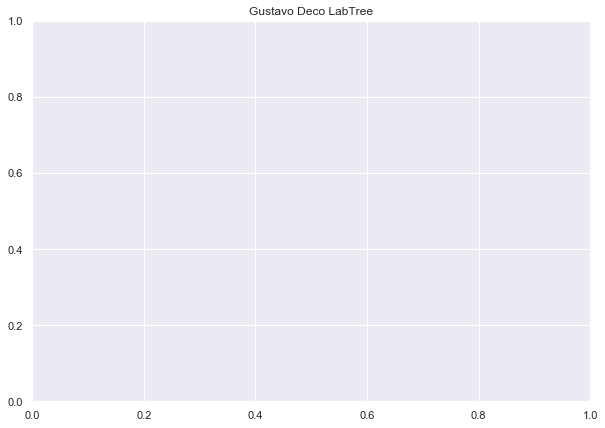

In [57]:
# hierarchical clustering python https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/

import scipy.cluster.hierarchy as shc

data = dataset.iloc[:].values

plt.figure(figsize=(10, 7))
plt.title("Gustavo Deco LabTree")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [61]:
# <----- Labtree code
#you can compute similarity/distance matrices between abstracts the way you want
#TfidfVectorizer and CountVectorizer methods can also provide you with most frequent words, keywords, word scores,...
import os
import urllib.request as urllib
import bs4
import re
import requests
import json
import subprocess
import pickle
import numpy as np
import plotly.graph_objs as go
import umap
import pandas as pd
import seaborn as sns
import scipy.spatial as sp
import scipy.cluster.hierarchy as hc
from sklearn.datasets import load_iris
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from sklearn.cluster import DBSCAN
from scipy.sparse import csr_matrix
from scipy.spatial.distance import pdist,squareform
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

vect = TfidfVectorizer(max_df = .8,lowercase=True, analyzer='word',stop_words= 'english',ngram_range=(1,1))
tfidf = vect.fit_transform(abstracts)
distance_matrix = np.abs(1-(tfidf@tfidf.T).A)
np.fill_diagonal(distance_matrix,0)

count = CountVectorizer(max_df = .8,lowercase=True, analyzer='word',stop_words= 'english',ngram_range=(1,1))
cv_fit=count.fit_transform(abstracts)

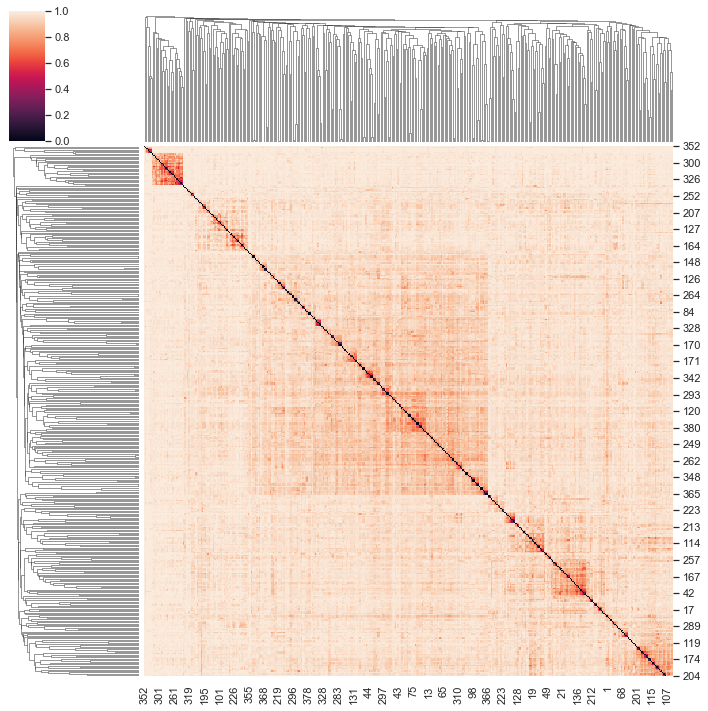

In [62]:
# clustering publications based on abstracts only 

linkage = hc.linkage(squareform(distance_matrix), method='average')
sns.clustermap(distance_matrix, row_linkage=linkage, col_linkage=linkage)